### Instructions

1. Run the given code and discuss the results.
2. Any idea as to why the data is averaged out over several years before we train a model?
2. Modify the code to explore the performance of different covariance functions (aka kernels) on the dataset.
When the breakout ends be prepared to discuss which covariance function (aka kernel) performed the best, and why.


### Troubleshooting

1. If the dataset is not present, then download it locally from: https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y6jxkY/cape-town-max-t.csv
2. Then upload it to CoCalc and the script should run.


In [7]:
import gzip
import csv
import GPy
import numpy as np
import matplotlib.pyplot as plt


def get_data(func, filename):
    with open(filename, 'rb') as f:
        reader = csv.reader(f)
        (xs, ys) = ([], [])
        for row in reader:
            try:
                x = func(row)
                y = float(row[3])
            except ValueError:
                continue
            xs.append(x)
            ys.append(y)
        return (xs, ys)


def average(xs, ys):
    N = 10000
    counts = np.zeros(N)
    sums = np.zeros(N)
    for (x, y) in zip(xs, ys):
        idx = int(x)
        counts[idx] += 1
        sums[idx] += y
    ind = counts != 0
    xs = np.arange(N)[ind]
    ys = sums[ind] / counts[ind]
    counts = counts[ind]
    return (xs, ys, counts)


def daily(row):
    dt = float(row[2])
    return int((dt - int(dt)) * 366)


In [9]:
f = "cape-town-max-t.txt"
xlabel = "Daily"
ylabel = "Max Temp"
(X, Y) = get_data(daily, f)
print(len(X))
(X, Y, _) = average(X, Y)
print(X.shape)
X = np.reshape(np.array(X), (-1, 1))
Y = np.reshape(np.array(Y), (-1, 1))

print(np.c_[X[:10], Y[:10]])

11903
(314,)
[[ 0.         27.29090909]
 [ 1.         28.13529412]
 [ 2.         28.36969697]
 [ 4.         29.5625    ]
 [ 5.         28.26764706]
 [ 6.         27.31764706]
 [ 7.         26.97121212]
 [ 8.         26.34      ]
 [ 9.         27.07647059]
 [11.         26.87222222]]


Optimization restart 1/1, f = 815.705163136

Name : GP regression
Objective : 815.705163136
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  Brownian.variance        |  2.3608901854923707  |      +ve      |        
  Gaussian_noise.variance  |  5.2385361895397065  |      +ve      |        


(15, 32)

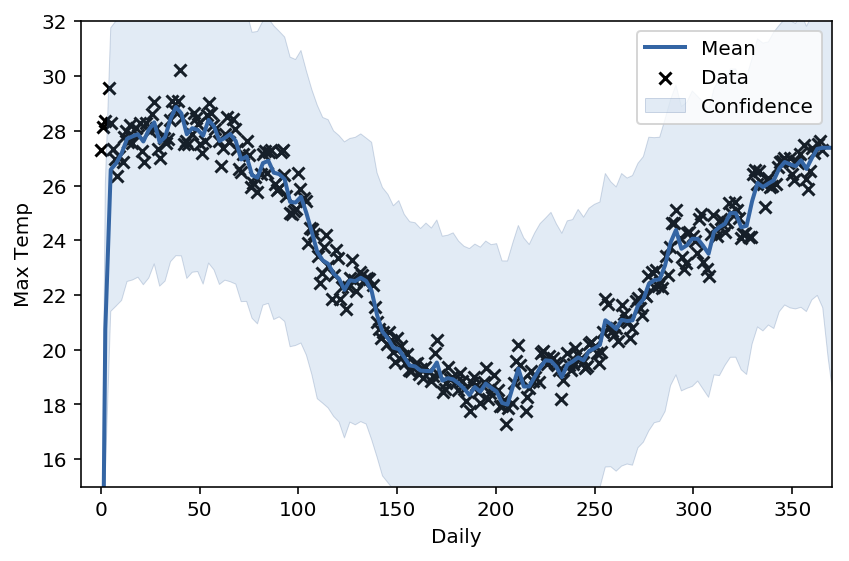

In [12]:
# kernel = GPy.kern.Matern32(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.Poly(input_dim=1, variance=.1, order=4.0)
# kernel = GPy.kern.Linear(input_dim=1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.StdPeriodic(
#     input_dim=1, variance=.1, lengthscale=20., period=366.0)
kernel = GPy.kern.Brownian(input_dim=1, variance=.1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1,
#                      lengthscale=20.) + GPy.kern.Poly(
 #                         input_dim=1, variance=.1, order=4.0)

m = GPy.models.GPRegression(X, Y, kernel=kernel)
m.optimize_restarts(num_restarts=1)
print(m)

fig = m.plot()
fig.axes.set_xlabel(xlabel)
fig.axes.set_ylabel(ylabel)
fig.axes.set_xlim([-10, 370])
fig.axes.set_ylim([+15, 32])


Optimization restart 1/1, f = 338.837624905

Name : GP regression
Objective : 338.837624905
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  sum.rbf.variance         |      0.2679702158199009  |      +ve      |        
  sum.rbf.lengthscale      |      11.508371889932832  |      +ve      |        
  sum.poly.variance        |     0.31396237542119776  |      +ve      |        
  sum.poly.scale           |  0.00017455564601925378  |      +ve      |        
  sum.poly.bias            |       6.699604590726718  |      +ve      |        
  Gaussian_noise.variance  |      0.3706310888805864  |      +ve      |        


(15, 32)

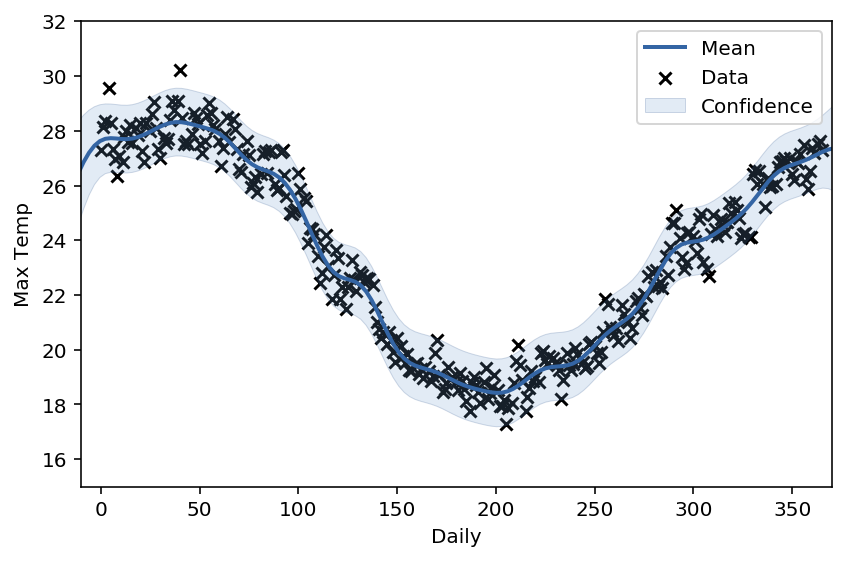

In [13]:
# kernel = GPy.kern.Matern32(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.Poly(input_dim=1, variance=.1, order=4.0)
# kernel = GPy.kern.Linear(input_dim=1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.StdPeriodic(
#     input_dim=1, variance=.1, lengthscale=20., period=366.0)
# kernel = GPy.kern.Brownian(input_dim=1, variance=.1)
kernel = GPy.kern.RBF(input_dim=1, variance=.1,
                     lengthscale=20.) + GPy.kern.Poly(
                         input_dim=1, variance=.1, order=4.0)

m = GPy.models.GPRegression(X, Y, kernel=kernel)
m.optimize_restarts(num_restarts=1)
print(m)

fig = m.plot()
fig.axes.set_xlabel(xlabel)
fig.axes.set_ylabel(ylabel)
fig.axes.set_xlim([-10, 370])
fig.axes.set_ylim([+15, 32])


Optimization restart 1/1, f = 332.555632411

Name : GP regression
Objective : 332.555632411
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.            |                value  |  constraints  |  priors
  std_periodic.variance     |    439.9889512865521  |      +ve      |        
  std_periodic.period       |    365.0019375650459  |      +ve      |        
  std_periodic.lengthscale  |    2.648831575674536  |      +ve      |        
  Gaussian_noise.variance   |  0.43111346805072753  |      +ve      |        


(15, 32)

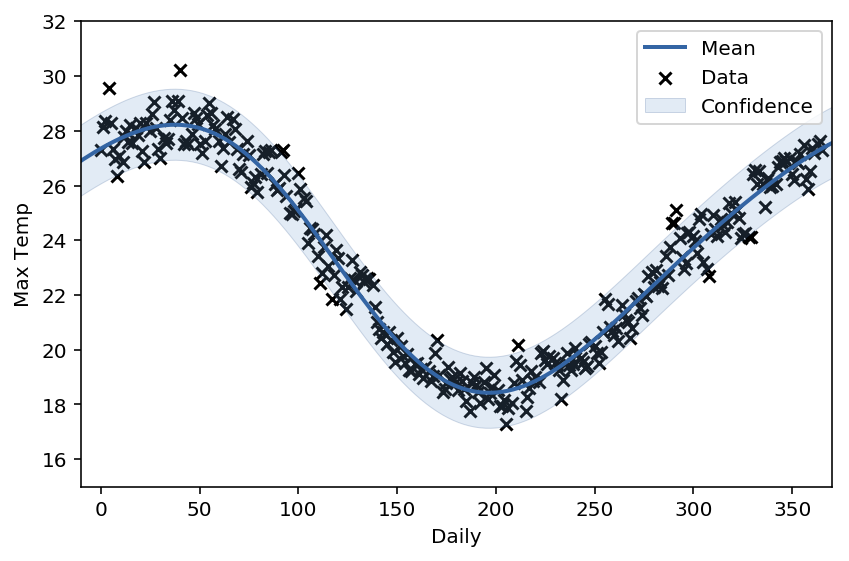

In [14]:
# kernel = GPy.kern.Matern32(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.Poly(input_dim=1, variance=.1, order=4.0)
# kernel = GPy.kern.Linear(input_dim=1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1, lengthscale=20.)
kernel = GPy.kern.StdPeriodic(
    input_dim=1, variance=.1, lengthscale=20., period=366.0)
# kernel = GPy.kern.Brownian(input_dim=1, variance=.1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1,
#                      lengthscale=20.) + GPy.kern.Poly(
 #                         input_dim=1, variance=.1, order=4.0)

m = GPy.models.GPRegression(X, Y, kernel=kernel)
m.optimize_restarts(num_restarts=1)
print(m)

fig = m.plot()
fig.axes.set_xlabel(xlabel)
fig.axes.set_ylabel(ylabel)
fig.axes.set_xlim([-10, 370])
fig.axes.set_ylim([+15, 32])


Optimization restart 1/1, f = 341.472380993

Name : GP regression
Objective : 341.472380993
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |    393.6014011570291  |      +ve      |        
  rbf.lengthscale          |   127.44913800265843  |      +ve      |        
  Gaussian_noise.variance  |  0.43487166163994156  |      +ve      |        


(15, 32)

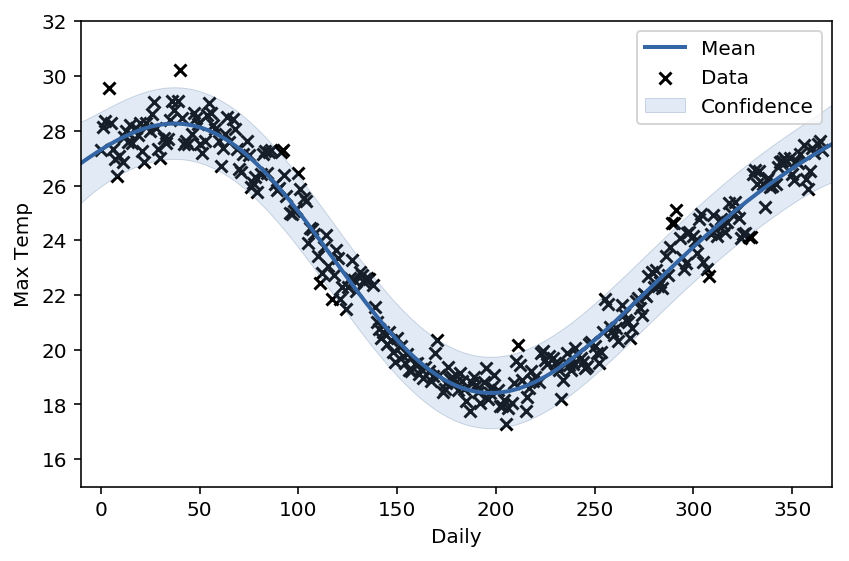

In [15]:
# kernel = GPy.kern.Matern32(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.Poly(input_dim=1, variance=.1, order=4.0)
# kernel = GPy.kern.Linear(input_dim=1)
kernel = GPy.kern.RBF(input_dim=1, variance=.1, lengthscale=20.)
# kernel = GPy.kern.StdPeriodic(
#     input_dim=1, variance=.1, lengthscale=20., period=366.0)
# kernel = GPy.kern.Brownian(input_dim=1, variance=.1)
# kernel = GPy.kern.RBF(input_dim=1, variance=.1,
#                      lengthscale=20.) + GPy.kern.Poly(
 #                         input_dim=1, variance=.1, order=4.0)

m = GPy.models.GPRegression(X, Y, kernel=kernel)
m.optimize_restarts(num_restarts=1)
print(m)

fig = m.plot()
fig.axes.set_xlabel(xlabel)
fig.axes.set_ylabel(ylabel)
fig.axes.set_xlim([-10, 370])
fig.axes.set_ylim([+15, 32])
